<a href="https://colab.research.google.com/github/ektakarmakar-analyst/PRODIGY_DS_05/blob/main/UK_Accident_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/accidents.csv')

In [ ]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200812D100026,460830.0,452510.0,-1.074261,53.965099,12,3,1,1,10/01/2008,...,0,0,4,2,2,0,0,1,1,E01013369
1,2.00912E+12,460220.0,446720.0,-1.084698,53.913137,12,3,1,1,01/01/2009,...,0,0,6,1,1,0,0,2,1,E01013450
2,2.00912E+12,461460.0,448010.0,-1.065564,53.924585,12,3,1,1,03/01/2009,...,0,0,4,1,4,0,0,2,1,E01013365
3,2.00912E+12,465130.0,451620.0,-1.008917,53.956579,12,2,2,1,04/01/2009,...,0,0,4,1,2,0,0,2,1,E01013351
4,2.00912E+12,460850.0,452490.0,-1.073960,53.964917,12,3,2,1,05/01/2009,...,0,8,4,1,1,0,0,1,1,E01013369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,2.01812E+12,460989.0,455804.0,-1.071206,53.994701,12,3,2,1,27/09/2018,...,0,0,1,1,1,0,0,2,1,E01013407
6511,2.01812E+12,460466.0,451339.0,-1.080066,53.954638,12,3,2,1,24/12/2018,...,0,0,4,2,2,0,0,1,1,E01033070
6512,2.01812E+12,459406.0,452928.0,-1.095908,53.969040,12,3,2,1,09/07/2018,...,0,0,1,1,1,0,0,1,2,E01013346
6513,2.01812E+12,461323.0,452491.0,-1.066777,53.964890,12,2,1,1,13/12/2018,...,0,0,1,1,1,0,0,1,1,E01013380


In [ ]:
# Convert 'Date' and 'Time' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Drop rows with missing Date or Severity
df = df.dropna(subset=['Date', 'Accident_Severity'])

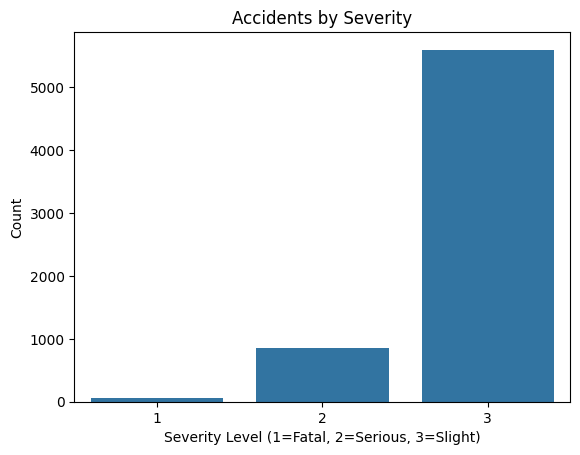

In [ ]:
# Count plot for severity
sns.countplot(data=df, x='Accident_Severity')
plt.title("Accidents by Severity")
plt.xlabel("Severity Level (1=Fatal, 2=Serious, 3=Slight)")
plt.ylabel("Count")
plt.show()

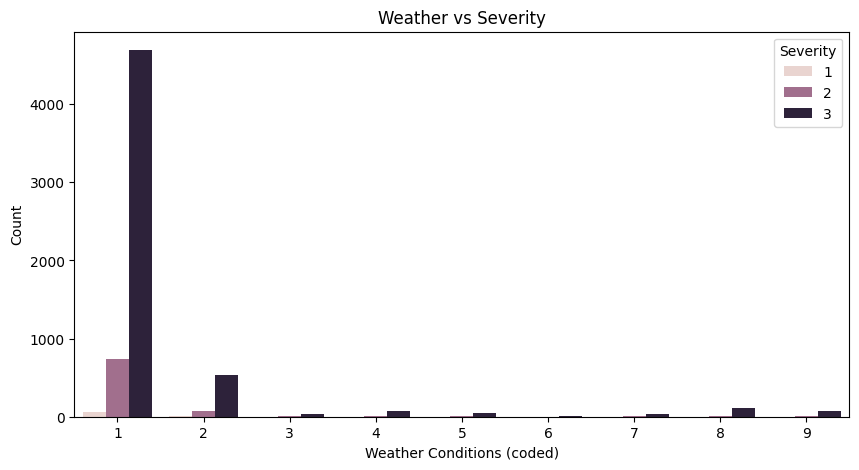

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity')
plt.title("Weather vs Severity")
plt.xlabel("Weather Conditions (coded)")
plt.ylabel("Count")
plt.legend(title='Severity')
plt.show()

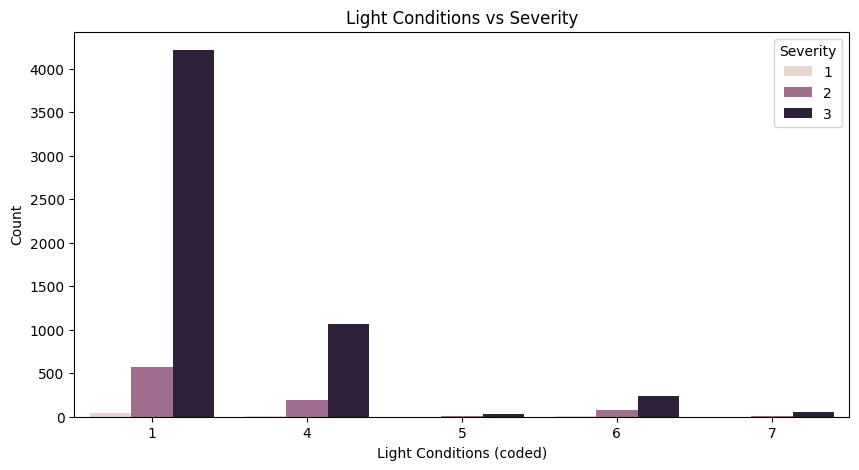

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Light_Conditions', hue='Accident_Severity')
plt.title("Light Conditions vs Severity")
plt.xlabel("Light Conditions (coded)")
plt.ylabel("Count")
plt.legend(title='Severity')
plt.show()

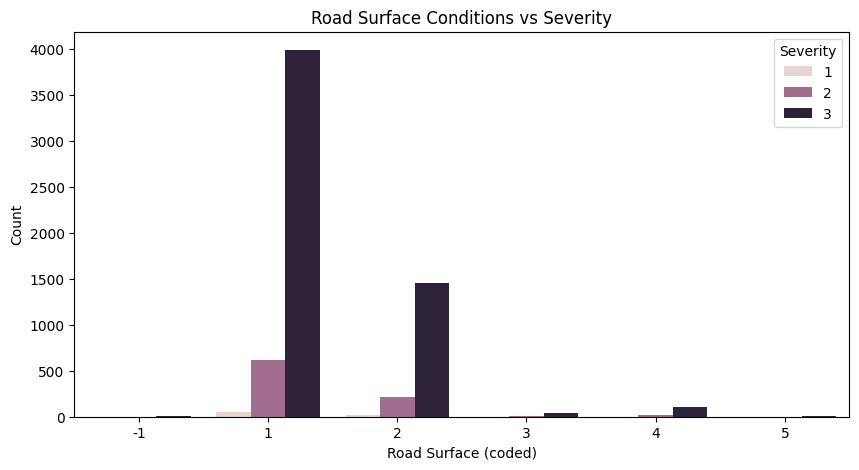

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Road_Surface_Conditions', hue='Accident_Severity')
plt.title("Road Surface Conditions vs Severity")
plt.xlabel("Road Surface (coded)")
plt.ylabel("Count")
plt.legend(title='Severity')
plt.show()

In [ ]:
# Create base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=7)

# Prepare heatmap data
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data[:1000]).add_to(m)  # sample for performance

# Save map
m.save("accident_heatmap.html")

In [ ]:
from google.colab import files
files.download("accident_heatmap.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>